In [ ]:
# Mengimpor librari Python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Membaca data dari Google Drive. Note: Disesuaikan dengan direktori yang digunakan
dataset = pd.read_csv('/content/drive/MyDrive/SERTIFIKASI/Bank_Churn_Modelling.csv')

# Menampilkan variabel dan ukuran data
def display_df(df):
      display(df.head())
      print(df.shape)
display_df(dataset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


(10000, 14)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,39.078223,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,13.453129,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,650.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Mengecek nilai duplikat
duplicate_rows = dataset[dataset.duplicated()]
print('Jumlah data duplikat =', len(duplicate_rows))

Jumlah data duplikat = 0


['Female' 'Male' 'M' 'F' nan]


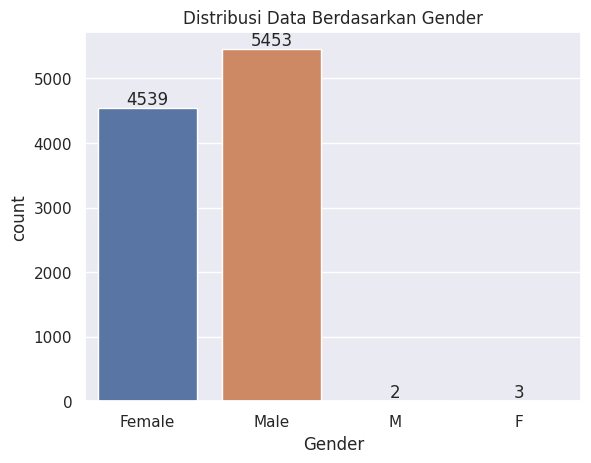

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa nilai unik pada kolom 'Geography'
unique_values = dataset['Gender'].unique()
print(unique_values)

# Analisis Distribusi Kategori
sns.set(style="darkgrid")
ax = sns.countplot(x='Gender', data=dataset)

# Menambahkan label pada batang plot
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribusi Data Berdasarkan Gender')
plt.show()

['France' 'Spain' 'Germany']


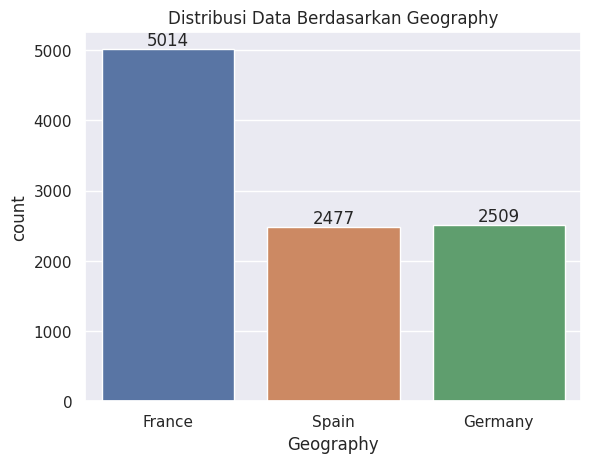

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa nilai unik pada kolom 'Geography'
unique_values = dataset['Geography'].unique()
print(unique_values)

# Analisis Distribusi Kategori
sns.set(style="darkgrid")
ax = sns.countplot(x='Geography', data=dataset)

# Menambahkan label pada batang plot
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribusi Data Berdasarkan Geography')
plt.show()

[ 2  1  8  7  4  6  3 10  5  9  0]


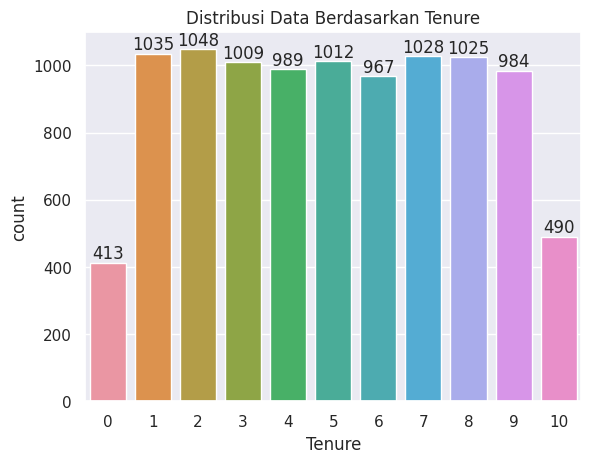

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa nilai unik pada kolom 'Geography'
unique_values = dataset['Tenure'].unique()
print(unique_values)

# Analisis Distribusi Kategori
sns.set(style="darkgrid")
ax = sns.countplot(x='Tenure', data=dataset)

# Menambahkan label pada batang plot
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribusi Data Berdasarkan Tenure')
plt.show()

[1 3 2 4]


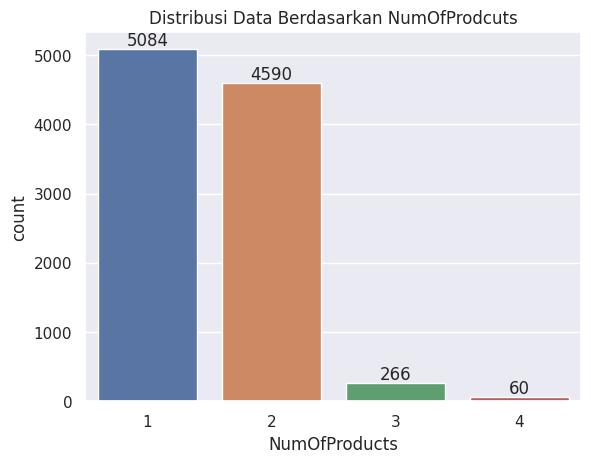

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa nilai unik pada kolom 'Geography'
unique_values = dataset['NumOfProducts'].unique()
print(unique_values)

# Analisis Distribusi Kategori
sns.set(style="darkgrid")
ax = sns.countplot(x='NumOfProducts', data=dataset)

# Menambahkan label pada batang plot
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribusi Data Berdasarkan NumOfProdcuts')
plt.show()

[1 0]


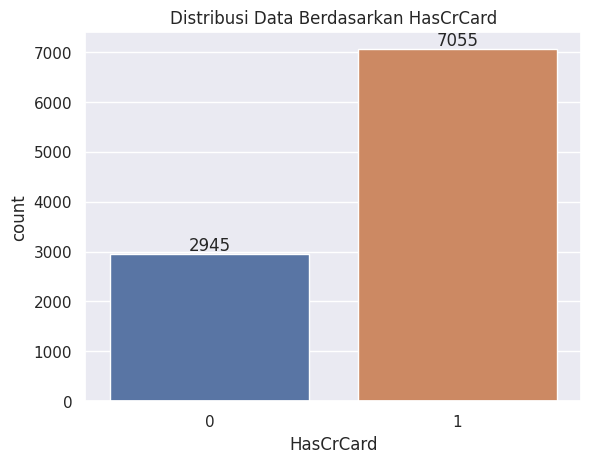

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa nilai unik pada kolom 'Geography'
unique_values = dataset['HasCrCard'].unique()
print(unique_values)

# Analisis Distribusi Kategori
sns.set(style="darkgrid")
ax = sns.countplot(x='HasCrCard', data=dataset)

# Menambahkan label pada batang plot
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribusi Data Berdasarkan HasCrCard')
plt.show()

[1 0]


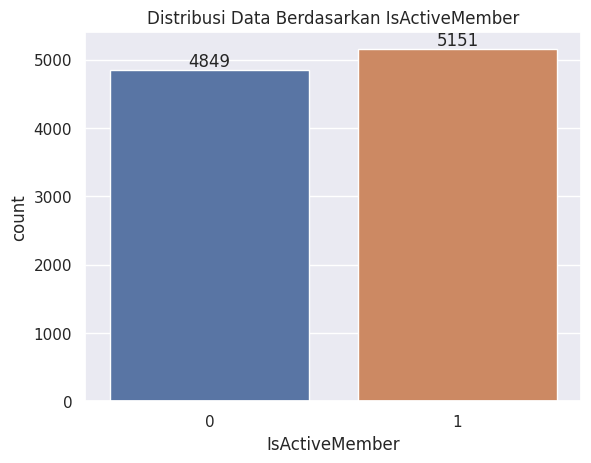

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa nilai unik pada kolom 'Geography'
unique_values = dataset['IsActiveMember'].unique()
print(unique_values)

# Analisis Distribusi Kategori
sns.set(style="darkgrid")
ax = sns.countplot(x='IsActiveMember', data=dataset)

# Menambahkan label pada batang plot
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribusi Data Berdasarkan IsActiveMember')
plt.show()

[1 0]


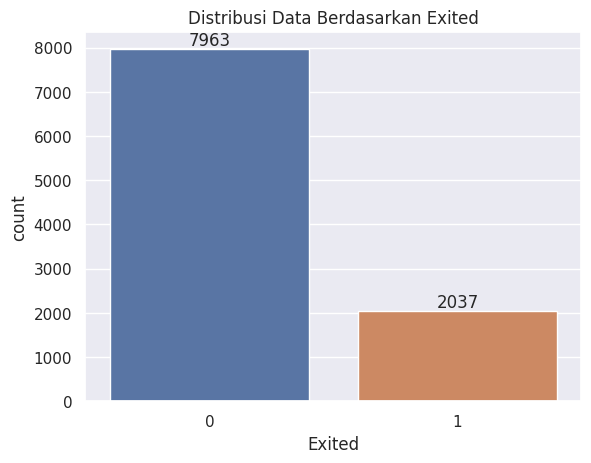

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa nilai unik pada kolom 'Geography'
unique_values = dataset['Exited'].unique()
print(unique_values)

# Analisis Distribusi Kategori
sns.set(style="darkgrid")
ax = sns.countplot(x='Exited', data=dataset)

# Menambahkan label pada batang plot
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribusi Data Berdasarkan Exited')
plt.show()

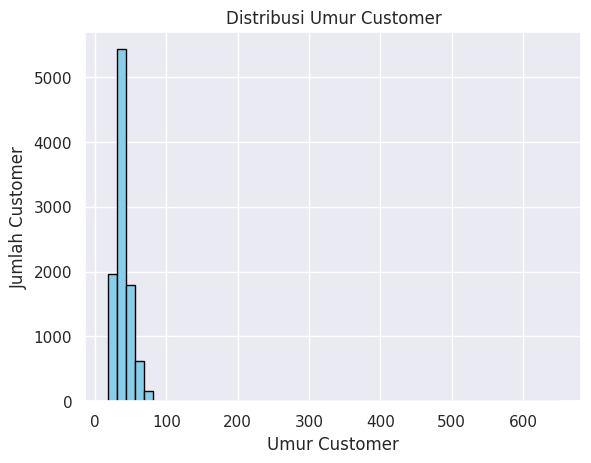

In [ ]:
from matplotlib import pyplot as plt
plt.hist(dataset['Age'], bins=50, color='skyblue', edgecolor='black')

# Memberikan Label dan Judul Histogram
plt.xlabel('Umur Customer')
plt.ylabel('Jumlah Customer')
plt.title('Distribusi Umur Customer')
plt.show()

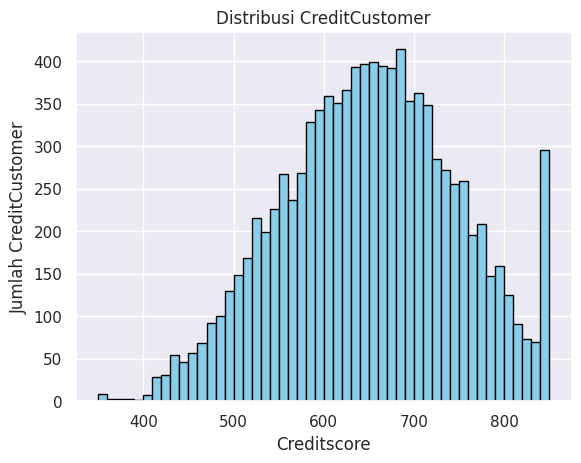

In [ ]:
from matplotlib import pyplot as plt
plt.hist(dataset['CreditScore'], bins=50, color='skyblue', edgecolor='black')

# Memberikan Label dan Judul Histogram
plt.xlabel('Creditscore')
plt.ylabel('Jumlah CreditCustomer')
plt.title('Distribusi CreditCustomer')
plt.show()

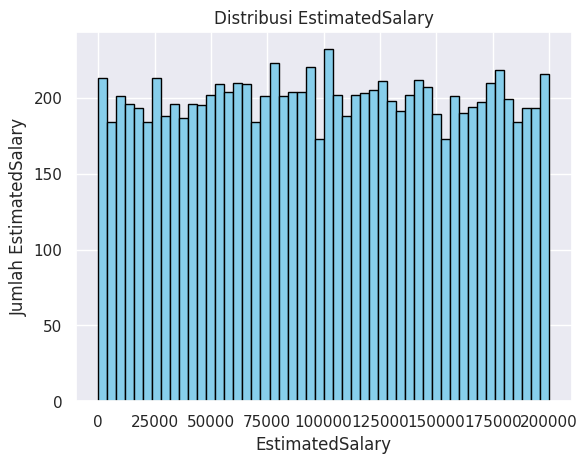

In [ ]:
from matplotlib import pyplot as plt
plt.hist(dataset['EstimatedSalary'], bins=50, color='skyblue', edgecolor='black')

# Memberikan Label dan Judul Histogram
plt.xlabel('EstimatedSalary')
plt.ylabel('Jumlah EstimatedSalary')
plt.title('Distribusi EstimatedSalary')
plt.show()

In [ ]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# pembersihan data
mode_Age=dataset['Gender'].mode()[0]
dataset['Gender'].fillna(mode_Age, inplace=True)

In [ ]:
# pembersihan data
mode_Age=dataset['Age'].mode()[0]
dataset['Age'].fillna(mode_Age, inplace=True)

In [ ]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataset.drop(columns=['Surname'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# List of column names with 'object' data type, excluding 'Surname'
object_columns = [col for col in dataset.select_dtypes(include=['object']).columns if col != 'Surname']

# Label encoding untuk kolom-kolom tersebut
for col in object_columns:
    dataset[col] = le.fit_transform(dataset[col])

# Tampilkan informasi tentang DataFrame yang telah diperbarui
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1015.8 KB


<Axes: >

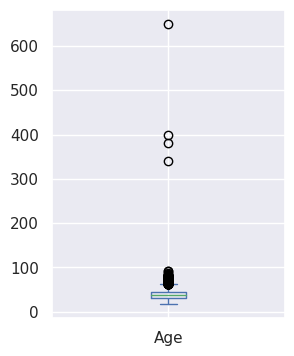

In [ ]:
dataset["Age"].plot(kind='box', figsize=(3, 4))

In [ ]:
# Menghitung IQR
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk data pencilan
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi data pencilan
outliers = dataset[(dataset['Age'] < lower_bound) | (dataset['Age'] > upper_bound)]

# Menghapus data pencilan
dataset_no_outliers = dataset[(dataset['Age'] >= lower_bound) & (dataset['Age'] <= upper_bound)]
dataset = dataset_no_outliers

<Axes: >

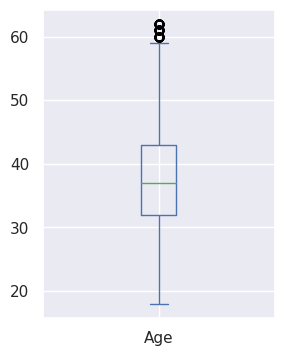

In [ ]:
dataset["Age"].plot(kind='box', figsize=(3, 4))

In [ ]:
# Menghitung IQR
Q1 = dataset['NumOfProducts'].quantile(0.25)
Q3 = dataset['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk data pencilan
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi data pencilan
outliers = dataset[(dataset['NumOfProducts'] < lower_bound) | (dataset['NumOfProducts'] > upper_bound)]

# Menghapus data pencilan
dataset_no_outliers = dataset[(dataset['NumOfProducts'] >= lower_bound) & (dataset['NumOfProducts'] <= upper_bound)]
dataset = dataset_no_outliers

<Axes: >

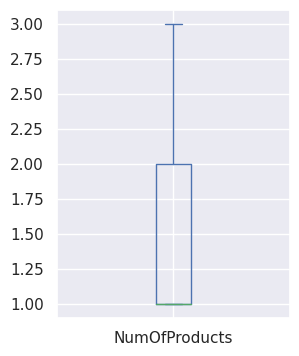

In [ ]:
dataset["NumOfProducts"].plot(kind='box', figsize=(3, 4))

In [ ]:
# Menghitung IQR
Q1 = dataset['CreditScore'].quantile(0.25)
Q3 = dataset['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk data pencilan
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi data pencilan
outliers = dataset[(dataset['CreditScore'] < lower_bound) | (dataset['CreditScore'] > upper_bound)]

# Menghapus data pencilan
dataset_no_outliers = dataset[(dataset['CreditScore'] >= lower_bound) & (dataset['CreditScore'] <= upper_bound)]
dataset = dataset_no_outliers

<Axes: >

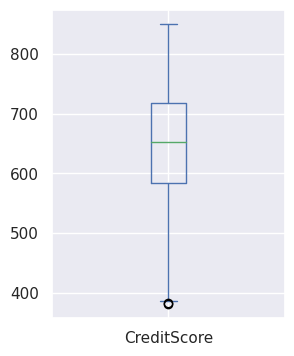

In [ ]:
dataset["CreditScore"].plot(kind='box', figsize=(3, 4))

[1 0]


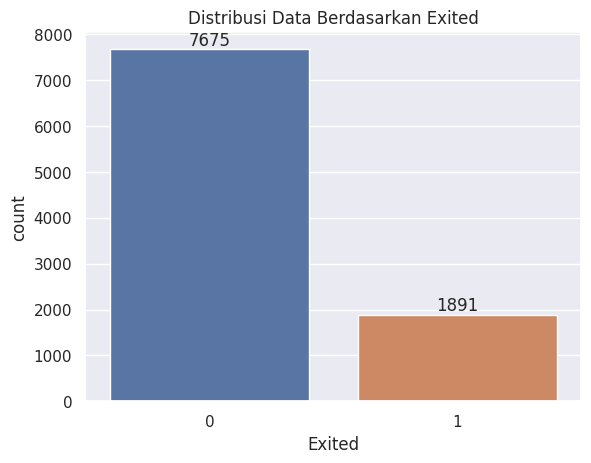

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa nilai unik pada kolom 'Geography'
unique_values = dataset['Exited'].unique()
print(unique_values)

# Analisis Distribusi Kategori
sns.set(style="darkgrid")
ax = sns.countplot(x='Exited', data=dataset)

# Menambahkan label pada batang plot
for label in ax.containers:
    ax.bar_label(label)

plt.title('Distribusi Data Berdasarkan Exited')
plt.show()

Distribusi Kelas Setelah Oversampling: Counter({1: 7675, 0: 7675})


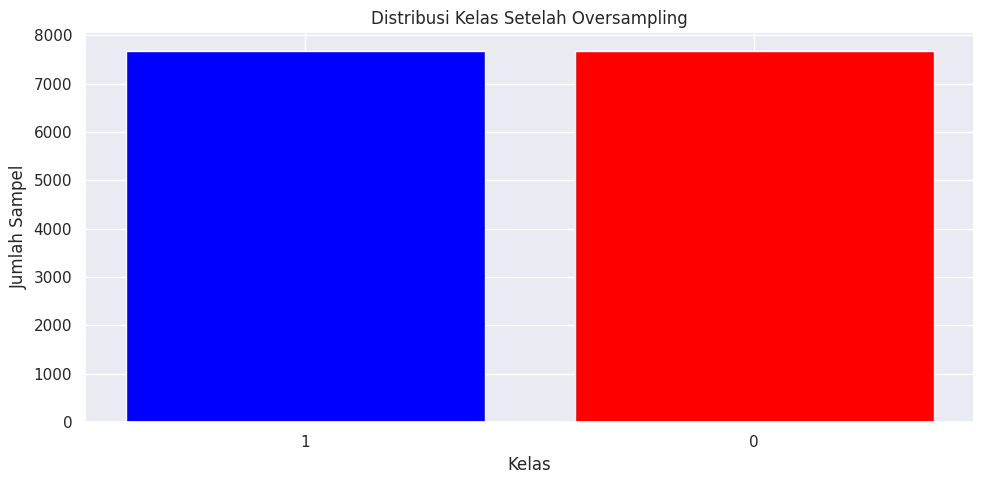

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15350 entries, 0 to 15349
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        15350 non-null  int64  
 1   CustomerId       15350 non-null  int64  
 2   CreditScore      15350 non-null  int64  
 3   Geography        15350 non-null  int64  
 4   Gender           15350 non-null  int64  
 5   Age              15350 non-null  float64
 6   Tenure           15350 non-null  int64  
 7   Balance          15350 non-null  float64
 8   NumOfProducts    15350 non-null  int64  
 9   HasCrCard        15350 non-null  int64  
 10  IsActiveMember   15350 non-null  int64  
 11  EstimatedSalary  15350 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 1.4 MB
<class 'pandas.core.series.Series'>
RangeIndex: 15350 entries, 0 to 15349
Series name: Exited
Non-Null Count  Dtype
--------------  -----
15350 non-null  int64
dtypes: int64(1)
memory usage: 120.0 

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Memisahkan fitur (X) dan target (y)
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling dengan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan distribusi kelas setelah oversampling
print("Distribusi Kelas Setelah Oversampling:", Counter(y_resampled))

# Mengatur data untuk diagram batang
labels_after_oversampling = ['1', '0']
values_after_oversampling = [Counter(y_resampled)[0], Counter(y_resampled)[1]]

# Membuat diagram batang
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))

# Diagram batang setelah oversampling
ax1.bar(labels_after_oversampling, values_after_oversampling, color=['blue', 'red'])
ax1.set_title('Distribusi Kelas Setelah Oversampling')
ax1.set_xlabel('Kelas')
ax1.set_ylabel('Jumlah Sampel')

plt.tight_layout()
plt.show()
X_resampled.info()
y_resampled.info()

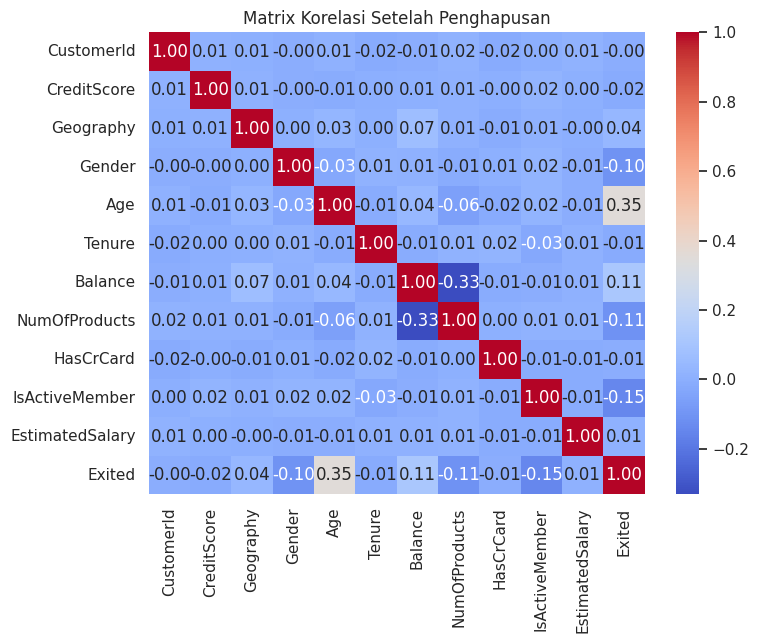

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghasilkan matriks korelasi
correlation_matrix = dataset.corr()

# Menghapus kolom/atribut tertentu dari matriks korelasi
atribut_yang_dihapus = 'RowNumber'
correlation_matrix.drop(atribut_yang_dihapus, axis=0, inplace=True)
correlation_matrix.drop(atribut_yang_dihapus, axis=1, inplace=True)

# Menampilkan heatmap setelah penghapusan atribut
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Korelasi Setelah Penghapusan')
plt.show()


In [ ]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15350 entries, 0 to 15349
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        15350 non-null  int64  
 1   CustomerId       15350 non-null  int64  
 2   CreditScore      15350 non-null  int64  
 3   Geography        15350 non-null  int64  
 4   Gender           15350 non-null  int64  
 5   Age              15350 non-null  float64
 6   Tenure           15350 non-null  int64  
 7   Balance          15350 non-null  float64
 8   NumOfProducts    15350 non-null  int64  
 9   HasCrCard        15350 non-null  int64  
 10  IsActiveMember   15350 non-null  int64  
 11  EstimatedSalary  15350 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 1.4 MB


In [ ]:
# Mengimpor library yang diperlukan no 14
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Membagi variabel data menjadi variabel dependent dan independent (target)
X_resampled = X_resampled.drop(['CustomerId', 'RowNumber'], axis=1)

# Membagi data input menjadi data training dan data testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Gini Index digunakan sebagai Splitting Criterion
modelDT_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
modelDT_gini.fit(X_train, y_train)
y_pred = modelDT_gini.predict(X_test)

# Confusion Matrix untuk DT
print("Confusion Matrix untuk DT :\n", confusion_matrix(y_test, y_pred), "\n")

# Classification Report untuk DT
print("Classification Report untuk DT :\n ", classification_report(y_test, y_pred, digits=4))

# Menghitung metrik evaluasi
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Akurasi  DT : {accuracy_dt:.2%}')
print(f'Presisi  DT : {precision_dt:.2%}')
print(f'Recall   DT : {recall_dt:.2%}')
print(f'F1-Score DT : {f1_dt:.2%}')

Confusion Matrix untuk DT :
 [[1000  549]
 [ 188 1333]] 

Classification Report untuk DT :
                precision    recall  f1-score   support

           0     0.8418    0.6456    0.7307      1549
           1     0.7083    0.8764    0.7834      1521

    accuracy                         0.7599      3070
   macro avg     0.7750    0.7610    0.7571      3070
weighted avg     0.7756    0.7599    0.7568      3070

Akurasi  DT : 75.99%
Presisi  DT : 70.83%
Recall   DT : 87.64%
F1-Score DT : 78.34%


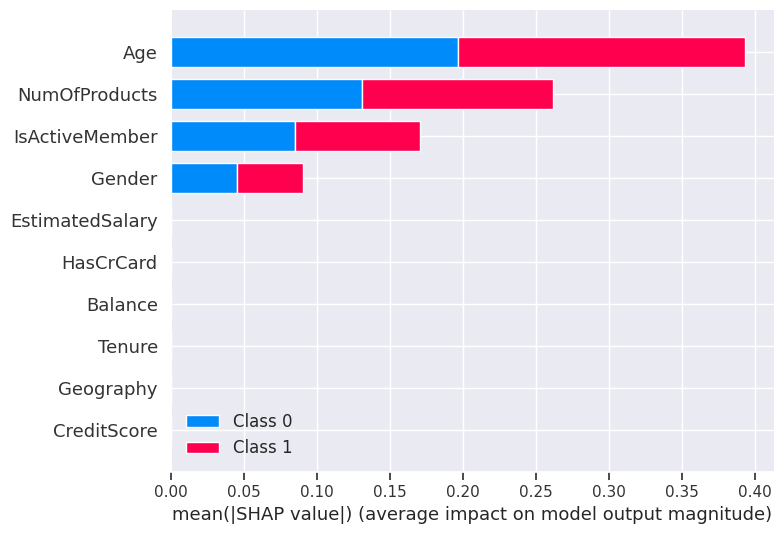

In [ ]:
!pip install shap
import shap

# Inisialisasi objek TreeExplainer untuk model Decision Tree
explainer_dt = shap.TreeExplainer(modelDT_gini)

# Menghitung SHAP values untuk data uji
shap_values_dt = explainer_dt.shap_values(X_resampled)

# Membuat summary plot dari SHAP values
shap.summary_plot(shap_values_dt, X_resampled, plot_type="bar")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


# help(KNeighborsClassifier)

knn_model = KNeighborsClassifier(n_neighbors=5)

# Confusion Matrix untuk DT
print("Confusion Matrix untuk KNN :\n", confusion_matrix(y_test, y_pred), "\n")

# Classification Report untuk DT
print("Classification Report untuk KNN :\n ", classification_report(y_test, y_pred, digits=4))

# Menghitung metrik evaluasi
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Akurasi  KNN : {accuracy_dt:.2%}')
print(f'Presisi  KNN : {precision_dt:.2%}')
print(f'Recall   KNN : {recall_dt:.2%}')
print(f'F1-Score KNN : {f1_dt:.2%}')

Confusion Matrix untuk KNN :
 [[1000  549]
 [ 188 1333]] 

Classification Report untuk KNN :
                precision    recall  f1-score   support

           0     0.8418    0.6456    0.7307      1549
           1     0.7083    0.8764    0.7834      1521

    accuracy                         0.7599      3070
   macro avg     0.7750    0.7610    0.7571      3070
weighted avg     0.7756    0.7599    0.7568      3070

Akurasi  KNN : 75.99%
Presisi  KNN : 70.83%
Recall   KNN : 87.64%
F1-Score KNN : 78.34%
